In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Sharpley value
import shap

#model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression 
# stepwise
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# perform
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# under-sample
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

# statics
import scipy.stats as st
import torch


In [2]:
#load the data
df = pd.read_csv("C:/Users/11961/OneDrive/documents/r/Honors Project/cleaned_default.csv")
df.head(5)
# orderinal categorical variables for pay_status, looking the difference

,Unnamed: 0,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#siplify the response variable' name
df['IsDefaulter']=df['default_payment_next_month']
df=df.drop('default_payment_next_month',axis = 1)
df=df.drop(df.columns[0],axis = 1)
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,IsDefaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

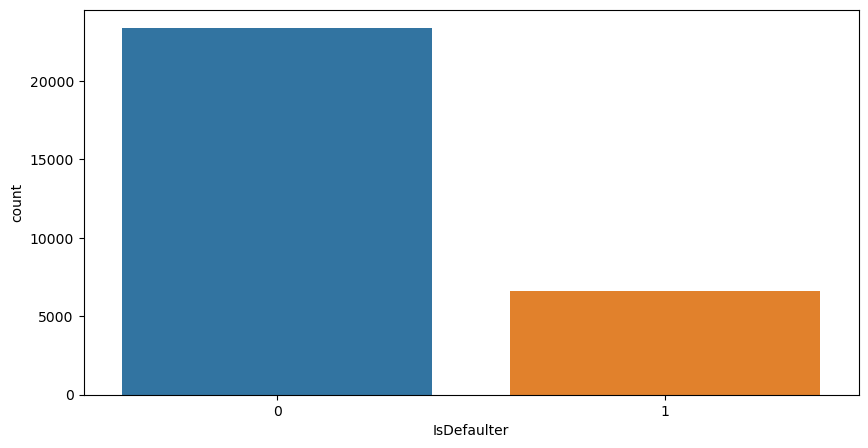

In [4]:
#Imbalance dataset
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [5]:
# Check the number of instances in different levels of categorical variables
categorical_features = ['sex', 'education', 'marriage']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']
df_cat.replace({'sex': {1 : 'MALE', 2 : 'FEMALE'}, 'education' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'marriage' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df_cat


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sex,education,marriage,Defaulter
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0
...,...,...,...,...
29995,MALE,high school,married,0
29996,MALE,high school,single,0
29997,MALE,university,single,1
29998,MALE,high school,married,1


<Figure size 1000x500 with 0 Axes>

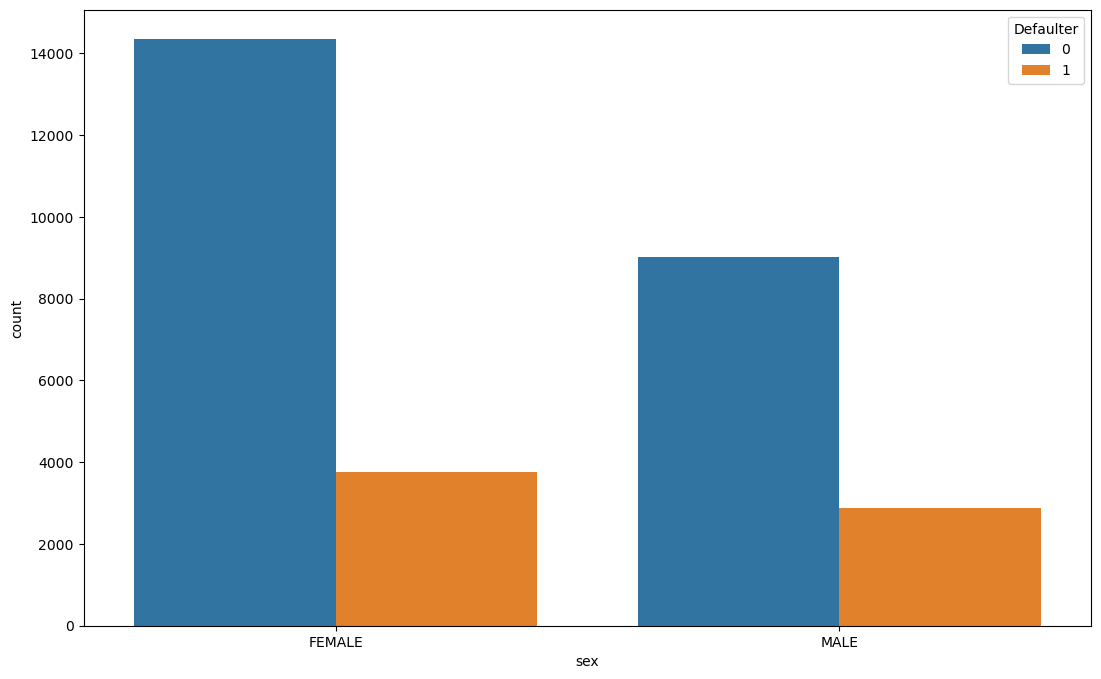

<Figure size 1000x500 with 0 Axes>

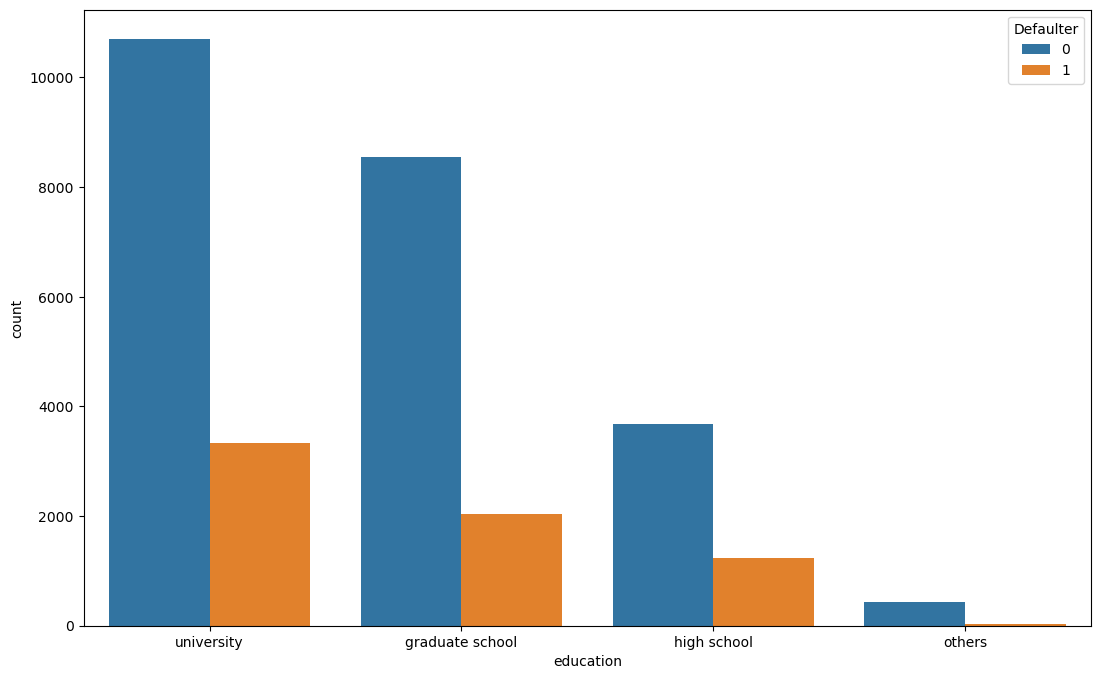

<Figure size 1000x500 with 0 Axes>

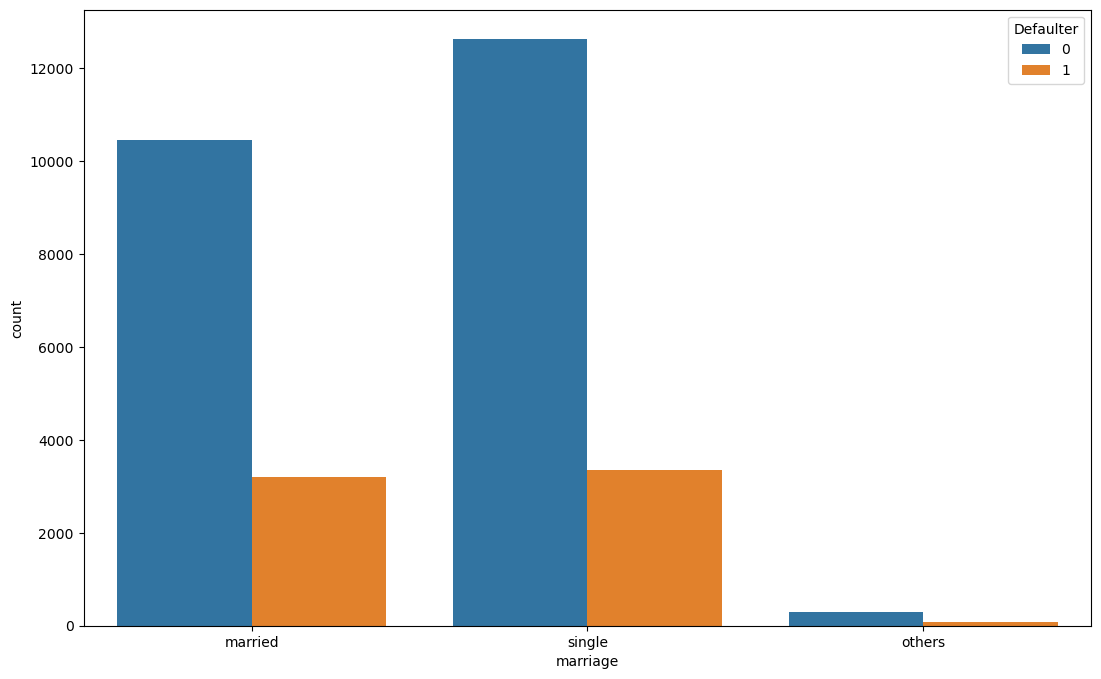

In [6]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=1,figsize=(13,8))
  #df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [18]:
# summary for feature limit_bal
df['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

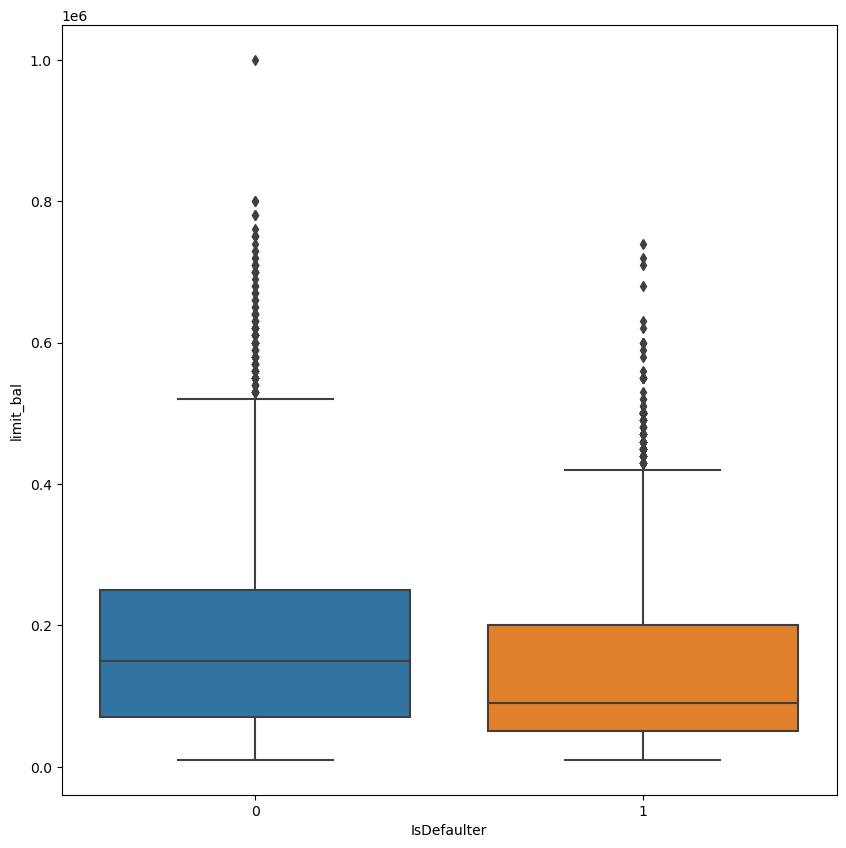

In [19]:
#relationship between age and default status
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="limit_bal", data=df)

In [23]:
#summary for feature age
df.groupby('IsDefaulter')['age'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: age, dtype: float64

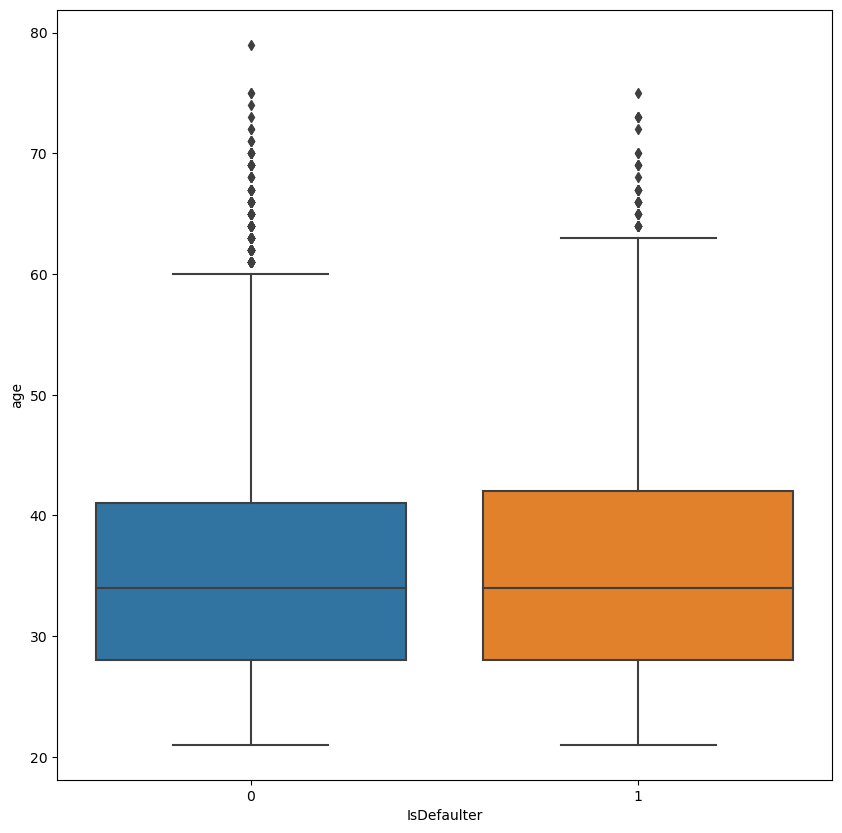

In [24]:
#relationship between age and default status
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="age", data=df)

In [7]:
#change the monthly feature names
df.rename(columns={'pay_0':'pay_Sep','pay_2':'pay_Aug','pay_3':'pay_Jul','pay_4':'pay_Jun','pay_5':'pay_May','pay_6':'pay_Apr'},inplace=True)
df.rename(columns={'bill_amt1':'bill_amt_Sep','bill_amt2':'bill_amt_Aug','bill_amt3':'bill_amt_Jul','bill_amt4':'bill_amt_Jun','bill_amt5':'bill_amt_May','bill_amt6':'bill_amt_Apr'}, inplace = True)
df.rename(columns={'pay_amt1':'pay_amt_Sep','pay_amt2':'pay_amt_Aug','pay_amt3':'pay_amt_Jul','pay_amt4':'pay_amt_Jun','pay_amt5':'pay_amt_May','pay_amt6':'pay_amt_Apr'},inplace=True)
df.head()

,limit_bal,sex,education,marriage,age,pay_Sep,pay_Aug,pay_Jul,pay_Jun,pay_May,...,bill_amt_Jun,bill_amt_May,bill_amt_Apr,pay_amt_Sep,pay_amt_Aug,pay_amt_Jul,pay_amt_Jun,pay_amt_May,pay_amt_Apr,IsDefaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


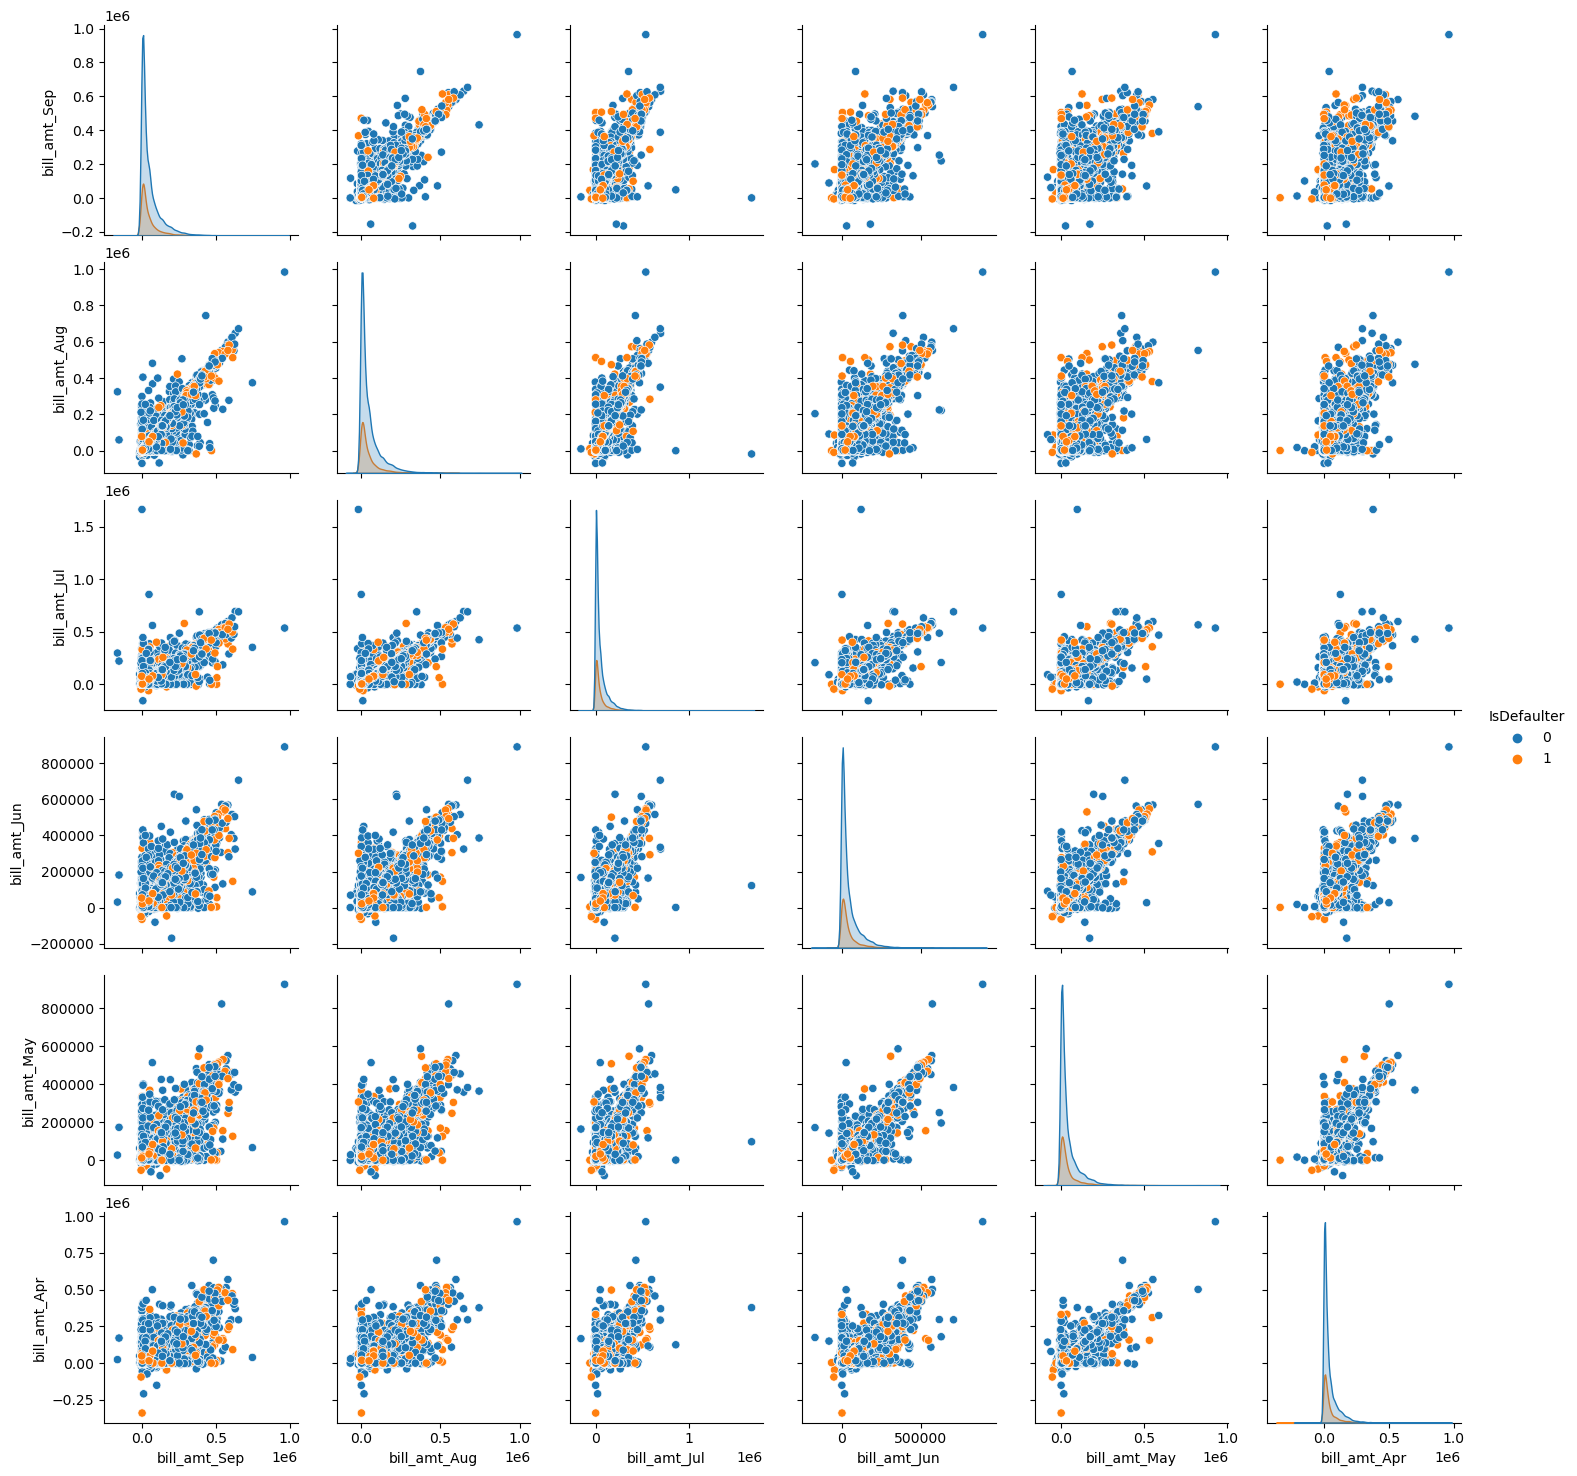

In [8]:
#check the correlation between monthly bill amount features
bill_amnt_df = df[['bill_amt_Sep','bill_amt_Aug','bill_amt_Jul','bill_amt_Jun','bill_amt_May','bill_amt_Apr','IsDefaulter']]
sns.pairplot(data = bill_amnt_df,hue='IsDefaulter')

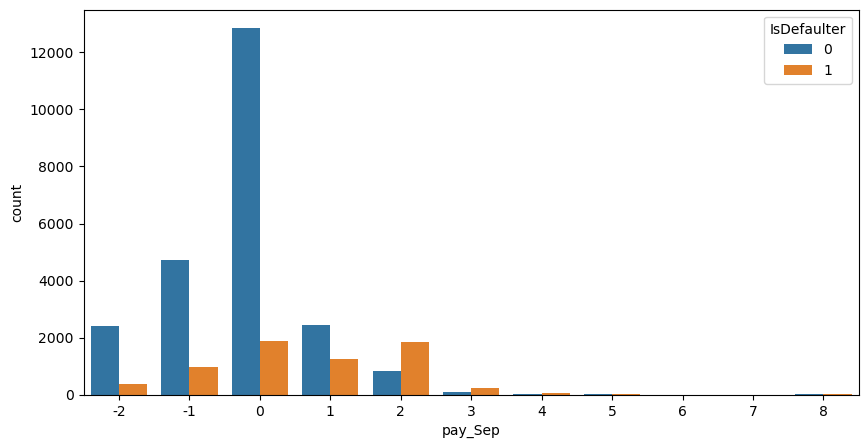

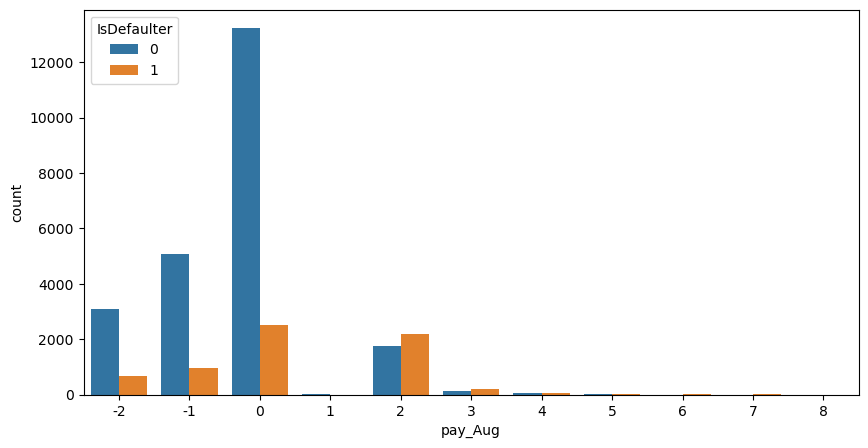

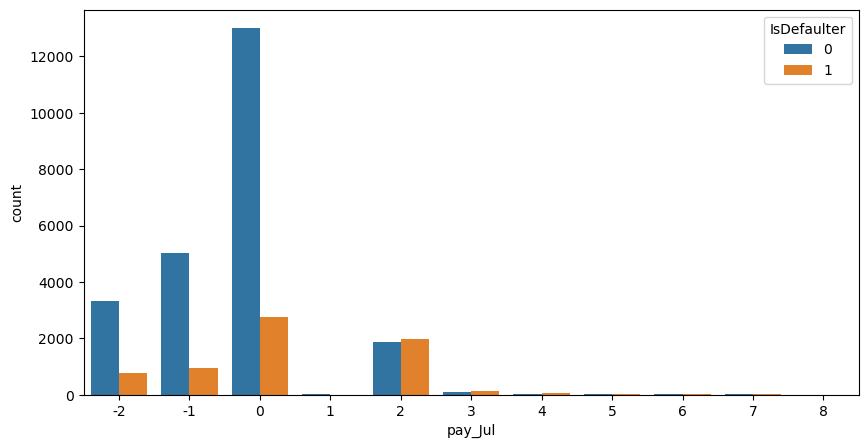

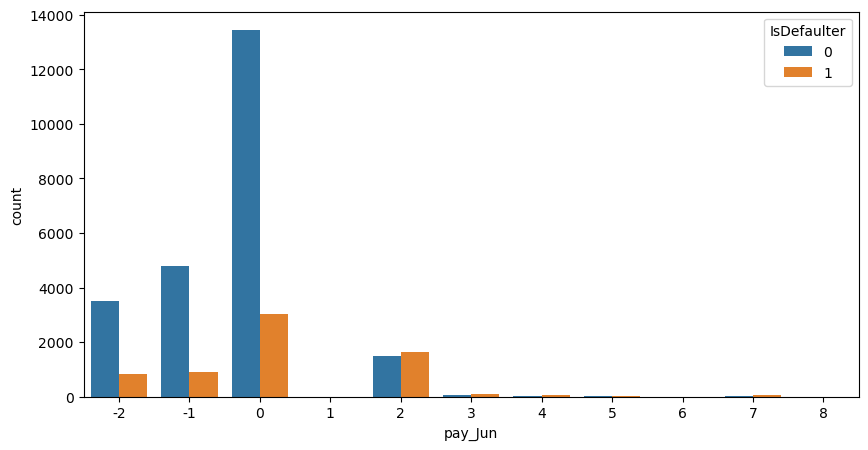

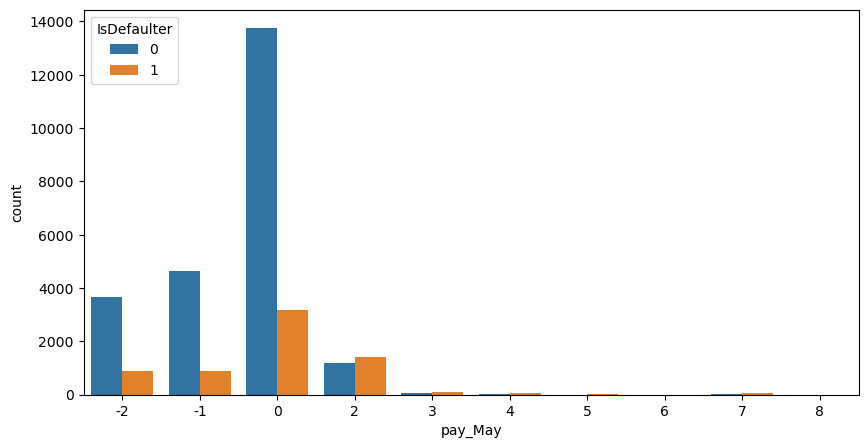

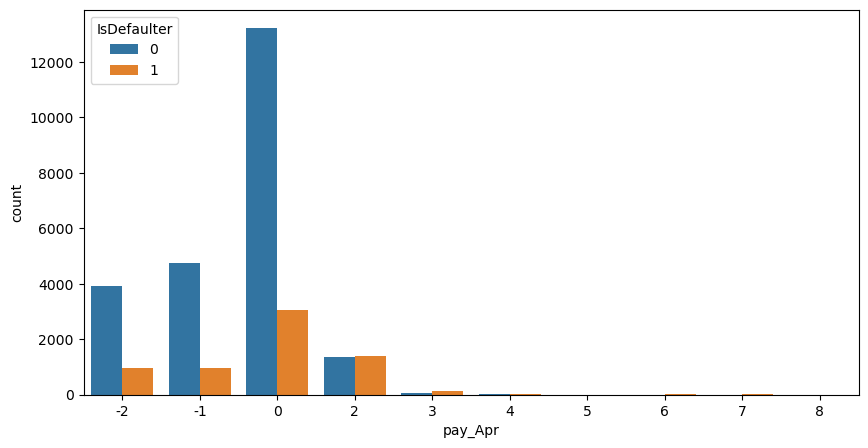

In [24]:
#check the relationship between monthly repayment status and defaut status
pay_col = ['pay_Sep','pay_Aug','pay_Jul','pay_Jun','pay_May','pay_Apr']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

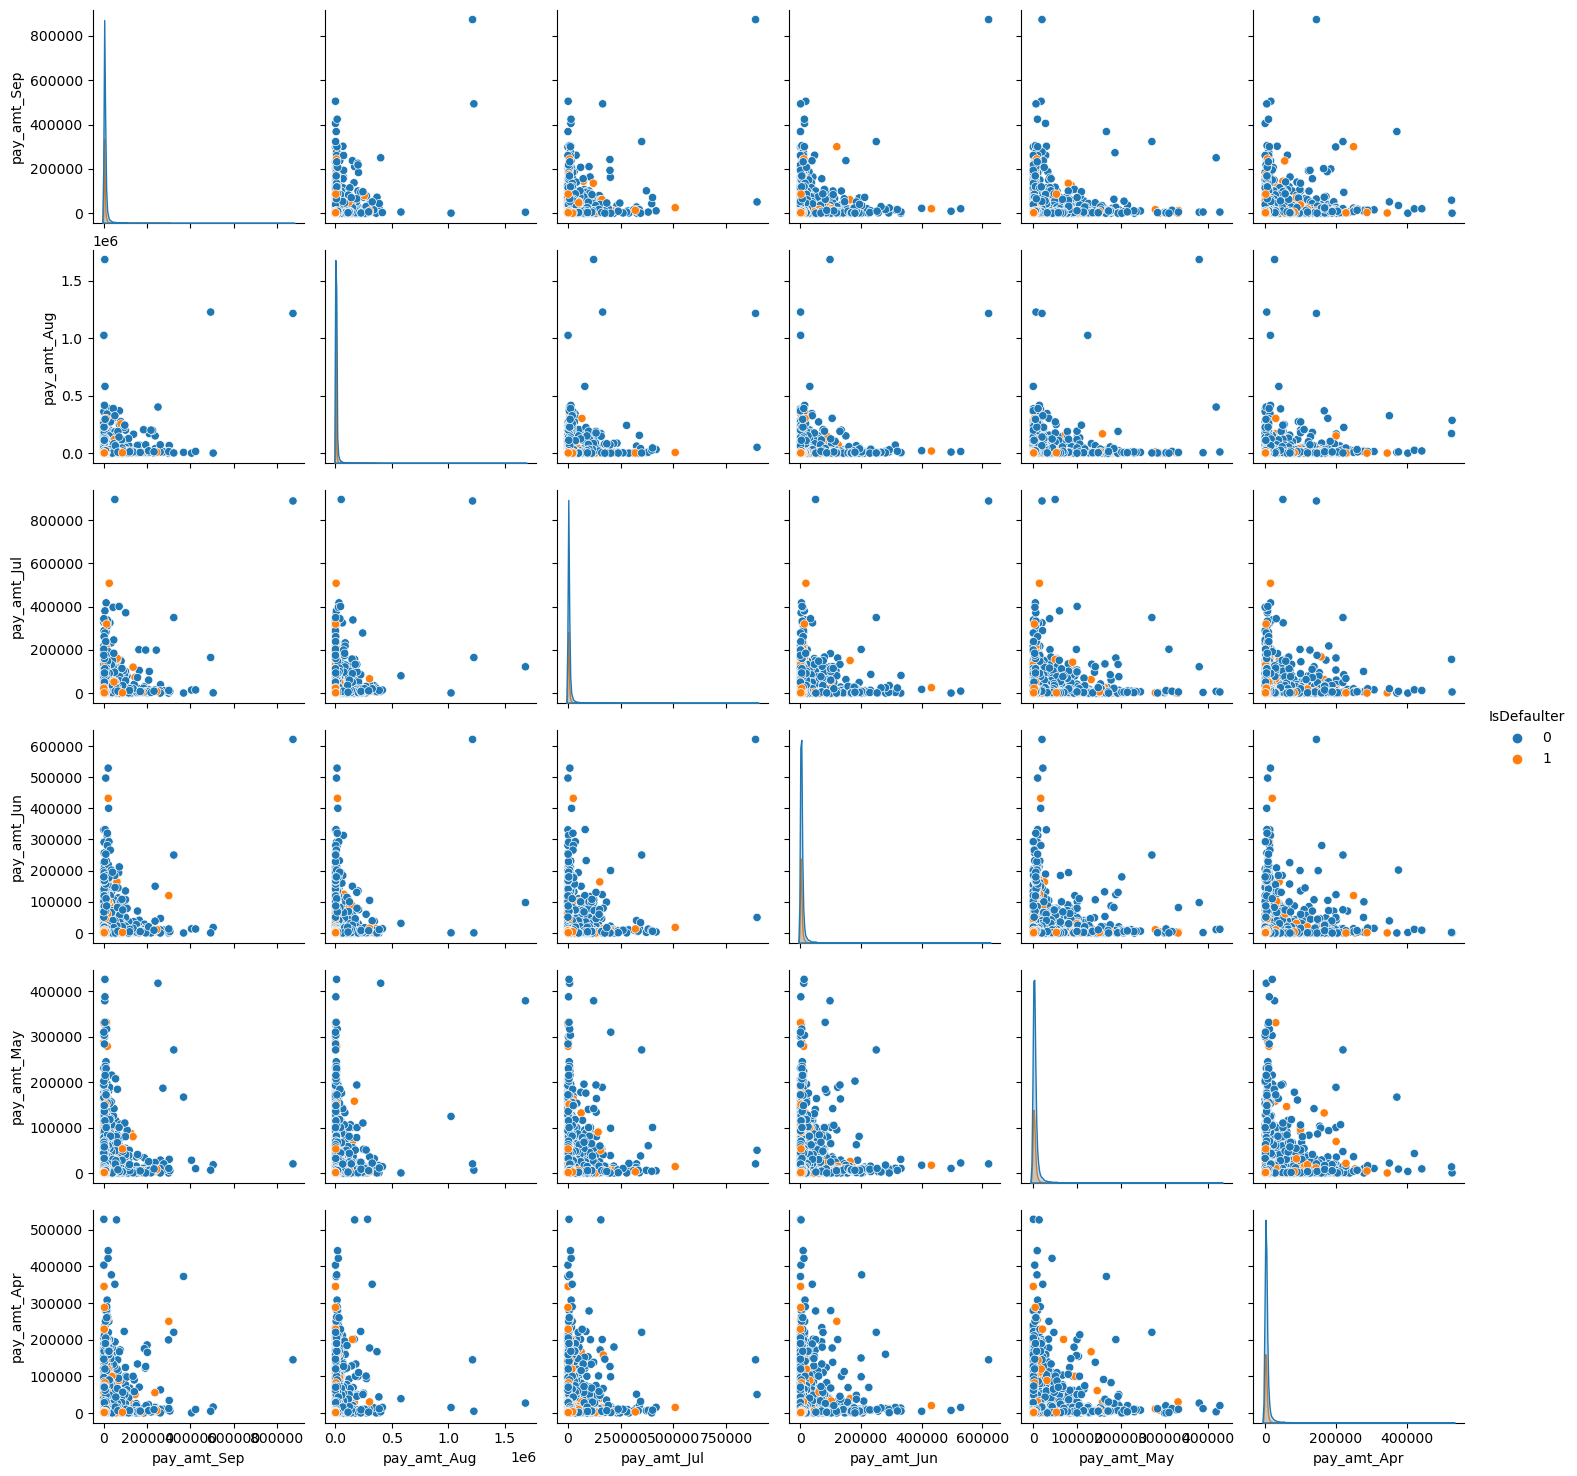

In [80]:
# check the relationship between monthly payment amount features
pay_amnt_df = df[['pay_amt_Sep','pay_amt_Aug','pay_amt_Jul','pay_amt_Jun','pay_amt_May','pay_amt_Apr', 'IsDefaulter']]
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

In [37]:
#correlation of the variables in the dataset
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,limit_bal,sex,education,marriage,age,pay_Sep,pay_Aug,pay_Jul,pay_Jun,pay_May,pay_Apr,bill_amt_Sep,bill_amt_Aug,bill_amt_Jul,bill_amt_Jun,bill_amt_May,bill_amt_Apr,pay_amt_Sep,pay_amt_Aug,pay_amt_Jul,pay_amt_Jun,pay_amt_May,pay_amt_Apr,IsDefaulter
limit_bal,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
sex,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,0.104088,0.088986,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
marriage,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,0.033168,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
age,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
pay_Sep,-0.271214,-0.057643,0.112593,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
pay_Aug,-0.296382,-0.070771,0.129703,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
pay_Jul,-0.286123,-0.066096,0.122425,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
pay_Jun,-0.267460,-0.060173,0.116531,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
pay_May,-0.249411,-0.055064,0.104088,0.034377,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [38]:
# creat a new dataset with two new variables (total payment values and total dues)
df_fr = df.copy()
df_fr['Payement_Value'] = df_fr['pay_Sep'] + df_fr['pay_Aug'] + df_fr['pay_Jul'] + df_fr['pay_Jun'] + df_fr['pay_May'] + df_fr['pay_Apr']
df_fr['Dues'] = (df_fr['bill_amt_Apr']+df_fr['bill_amt_May']+df_fr['bill_amt_Jun']+df_fr['bill_amt_Jul']+df_fr['bill_amt_Sep'])-(df_fr['pay_amt_Apr']+df_fr['pay_amt_May']+df_fr['pay_amt_Jun']+df_fr['pay_amt_Jul']+df_fr['pay_amt_Aug']+df_fr['pay_amt_Sep'])

<AxesSubplot:xlabel='IsDefaulter', ylabel='Payement_Value'>

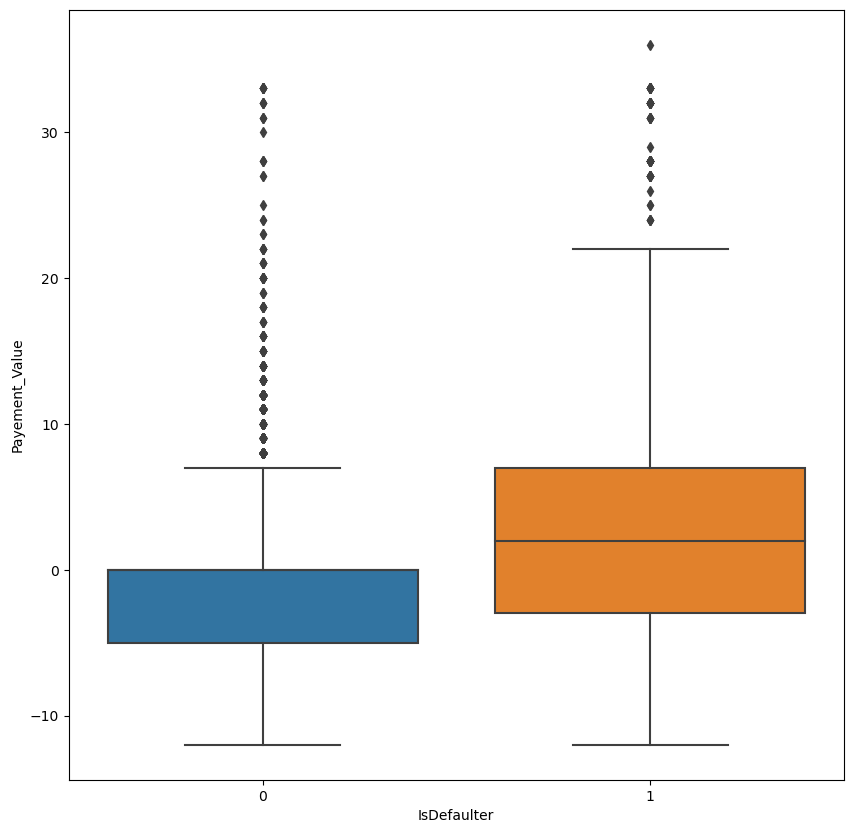

In [39]:
#check the relationship between total payment and defaut status
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

<AxesSubplot:xlabel='IsDefaulter', ylabel='Dues'>

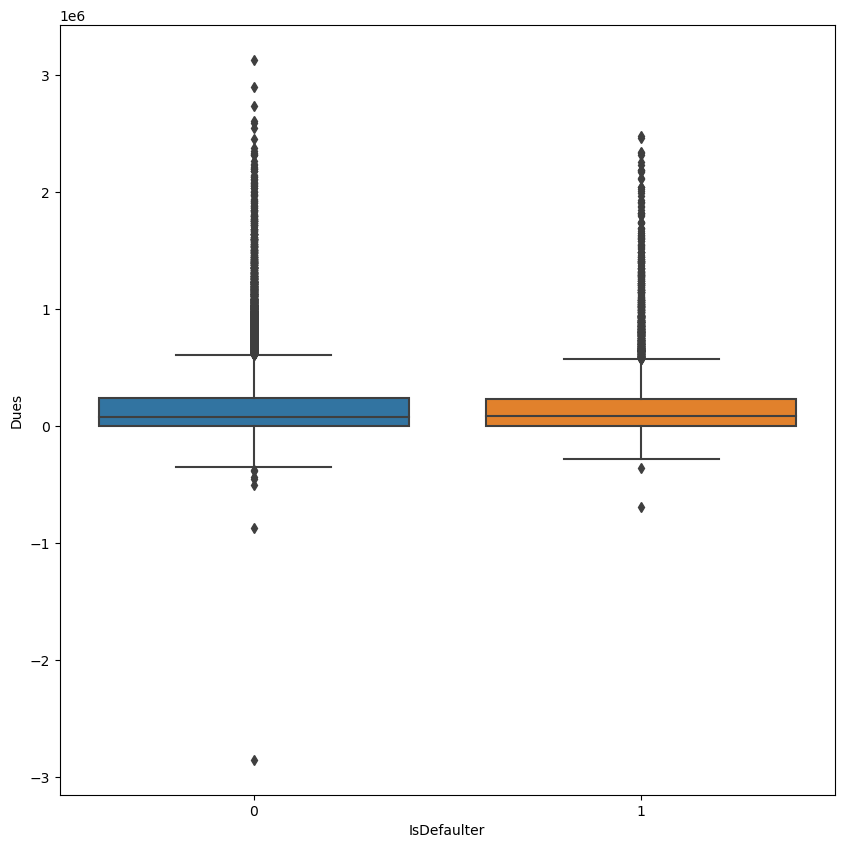

In [40]:
# check the relationship between total dues and default status
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Dues' )

In [31]:
#change the categorial variables to dummy variables and remove the "other" class
df_fr.replace({'sex': {1 : 'MALE', 2 : 'FEMALE'}, 'education' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'marriage' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df_fr = pd.get_dummies(df_fr,columns=['education','marriage'])
df_fr.drop(['education_others','marriage_others'],axis = 1, inplace = True)

In [35]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "sex":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [36]:
df_fr.head()

,limit_bal,sex,age,pay_Sep,pay_Aug,pay_Jul,pay_Jun,pay_May,pay_Apr,bill_amt_Sep,...,pay_amt_May,pay_amt_Apr,IsDefaulter,Payement_Value,Dues,education_graduate school,education_high school,education_university,marriage_married,marriage_single
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,-2,3913,0,0,1,1,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,0,2000,1,3,10352,0,0,1,0,1
2,90000,0,34,0,0,0,0,0,0,29239,...,1000,5000,0,0,76608,0,0,1,0,1
3,50000,0,37,0,0,0,0,0,0,46990,...,1069,1000,0,0,174713,0,0,1,1,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,-2,44620,0,0,1,1,0


In [213]:
df_fr.to_csv('./Final_df.csv')